In [1]:
# 1. 데이터 가져오기
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [2]:
# 2,3. x,y 데이터 준비 
df_x = diabetes.data
df_y = diabetes.target

In [3]:
# 데이터 확인
print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


In [4]:
# 데이터 확인
print(type(df_x))
print(type(df_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# 4. train/test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y,test_size=0.2, random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


In [7]:
# 5. 모델 준비(다중 선형 회귀)
import numpy as np

# nd.dot(X, w) + b  == predictions += x[:, i] * w[i] + b

def linreg(x, w, b):    
    prediction = np.dot(x,w) + b    
    return prediction

In [8]:
# 6. 손실함수 loss 정의하기(mse)

def loss(a,b):
    mse = ((a - b) ** 2).mean()
    return mse


In [15]:
# 7. 기울기 구현

def gradient(X,W,b,y, y_pred):
    
    N = len(y)      
    
    # 미분 공식
    dW = 1/N * 2 * X.T.dot(y_pred - y) #== 2x(pred-real)/n
#     gradient_w = np.sum((w*X_train+b-y_train)*2*X_train)/len(X_train)
    
    db = 2 * (y_pred - y).mean() 
#     gradient_b = np.sum((w*X_train+b-y_train)*2)/len(X_train)
    
    return dW, db

# from mxnet import autograd, nd
# w.attach_grad()
# b.attach_grad()

# L = MSE(predictions, y)


In [51]:
# 8.학습률 설정
lr = 0.1
epochs = 1000
w = np.random.rand(10)
b = np.random.rand()

In [52]:
# 9. 모델 학습

losses = []
for epoch in range(epochs):
    y_pred = linreg(X_train, w, b)    
    
    l = loss(y_pred, y_train)
    losses.append(l)

    dw, db = gradient(X_train, w, b, y_train, y_pred)
    w -= lr*dw
    b -= lr*db
    if epoch % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (epoch, l))
    

Iteration 0 : Loss 29491.1038
Iteration 10 : Loss 6253.0941
Iteration 20 : Loss 5910.1882
Iteration 30 : Loss 5833.5586
Iteration 40 : Loss 5762.2513
Iteration 50 : Loss 5693.1815
Iteration 60 : Loss 5626.2398
Iteration 70 : Loss 5561.3537
Iteration 80 : Loss 5498.4537
Iteration 90 : Loss 5437.4727
Iteration 100 : Loss 5378.3458
Iteration 110 : Loss 5321.0106
Iteration 120 : Loss 5265.4066
Iteration 130 : Loss 5211.4757
Iteration 140 : Loss 5159.1616
Iteration 150 : Loss 5108.4101
Iteration 160 : Loss 5059.1688
Iteration 170 : Loss 5011.3872
Iteration 180 : Loss 4965.0165
Iteration 190 : Loss 4920.0096
Iteration 200 : Loss 4876.3211
Iteration 210 : Loss 4833.9071
Iteration 220 : Loss 4792.7252
Iteration 230 : Loss 4752.7347
Iteration 240 : Loss 4713.8959
Iteration 250 : Loss 4676.1709
Iteration 260 : Loss 4639.5229
Iteration 270 : Loss 4603.9164
Iteration 280 : Loss 4569.3171
Iteration 290 : Loss 4535.6919
Iteration 300 : Loss 4503.0090
Iteration 310 : Loss 4471.2374
Iteration 320 : Lo

In [53]:
# 10. 테스트 데이터 성능 확인
prediction = linreg(X_test,w,b)
mse = loss(prediction, y_test)
mse

3090.222992706629

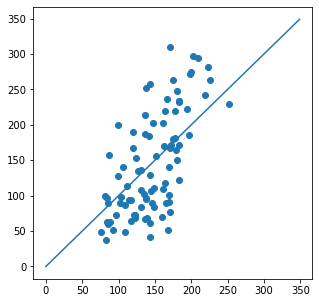

In [54]:
# 11. 정답 데이터, 예측 데이터 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

x = np.arange(0, 350)
plt.plot(x,x)

plt.scatter(prediction, y_test )
plt.show()